no of features := 4
no of data points := 148


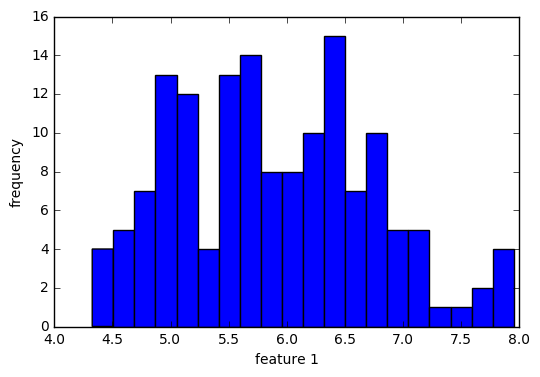

In [9]:
#Quetion 1
import mltools as ml
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the text file
Y = iris[:,-1]
# target value is the last column
X = iris[:,0:-1]
# features are the other columns
#(a)
print ("no of features :=" , X.shape[1])
print("no of data points :=", X.shape[0])
#(b)
plt.hist(X[:,0],bins = 20)
plt.xlabel("feature 1")
plt.ylabel("frequency")
plt.show()

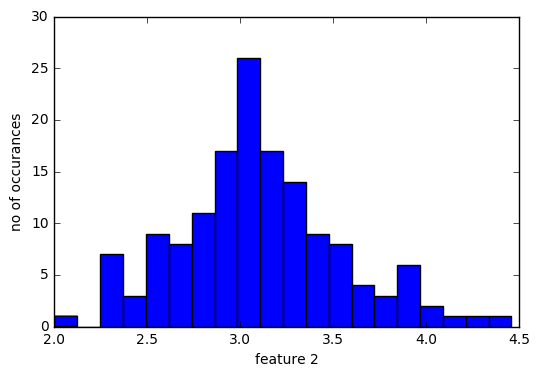

In [8]:
plt.hist(X[:,1],bins = 20)
plt.xlabel("feature 2")
plt.ylabel("frequency")
plt.show()

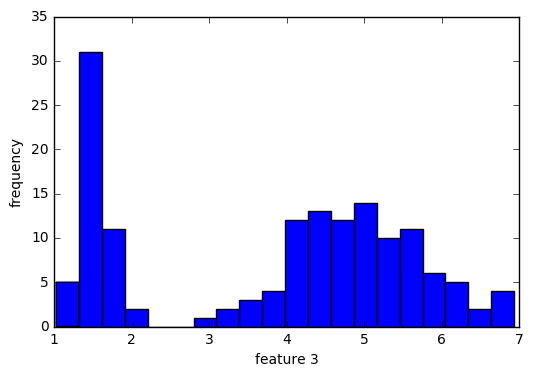

In [10]:
plt.hist(X[:,2],bins = 20)
plt.xlabel("feature 3")
plt.ylabel("frequency")
plt.show()

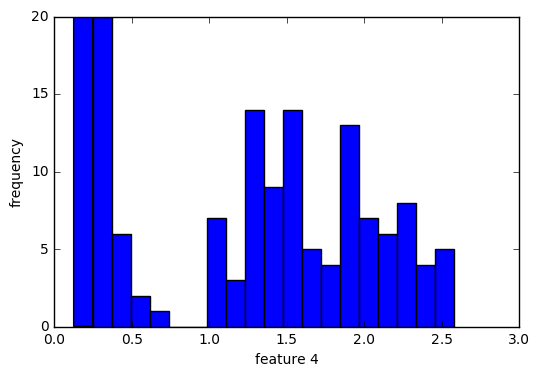

In [11]:
plt.hist(X[:,3],bins = 20)
plt.xlabel("feature 4")
plt.ylabel("frequency")
plt.show()

In [14]:
#(c)
print ("mean of feature 1 :=", np.mean(X[:,0]))
print ("mean of feature 2 :=", np.mean(X[:,1]))
print ("mean of feature 3 :=", np.mean(X[:,2]))
print ("mean of feature 4 :=", np.mean(X[:,3]))

mean of feature 1 := 5.90010376419
mean of feature 2 := 3.09893091689
mean of feature 3 := 3.81955484054
mean of feature 4 := 1.25255548459


In [16]:
#(d)
print ("varriance and standard deviation  of feature 1 :=", np.var(X[:,0]),np.std(X[:,0]))
print ("varriance and standard deviation  of feature 2 :=", np.var(X[:,1]),np.std(X[:,1]))
print ("varriance and standard deviation  of feature 3 :=", np.var(X[:,2]),np.std(X[:,2]))
print ("varriance and standard deviation  of feature 4 :=", np.var(X[:,3]),np.std(X[:,3]))

varriance and standard deviation  of feature 1 := 0.694559004905 0.833402066775
varriance and standard deviation  of feature 2 := 0.190350567906 0.436291838001
varriance and standard deviation  of feature 3 := 3.07671634284 1.75405710934
varriance and standard deviation  of feature 4 := 0.575735641542 0.758772457026


In [18]:
#(e)data normalization
X_normalized = X
X_normalized[:,0]= (X[:,0]-np.mean(X[:,0]))/np.std(X[:,0])
X_normalized[:,1]= (X[:,1]-np.mean(X[:,1]))/np.std(X[:,1])
X_normalized[:,2]= (X[:,2]-np.mean(X[:,2]))/np.std(X[:,2])
X_normalized[:,3]= (X[:,3]-np.mean(X[:,3]))/np.std(X[:,3])

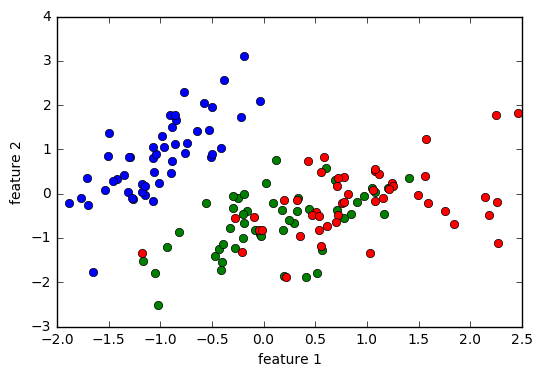

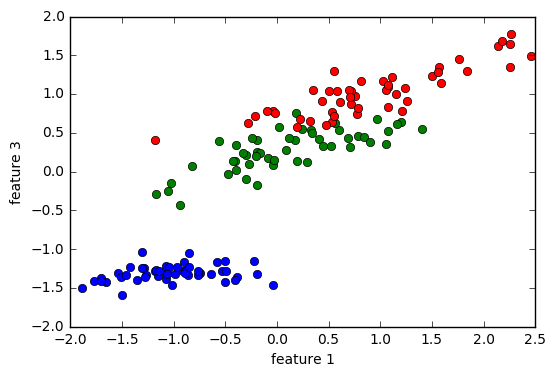

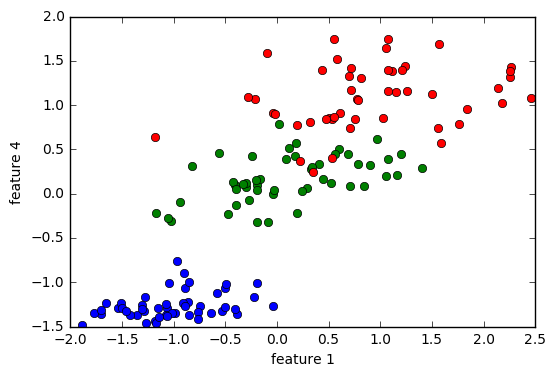

In [22]:
#(f)scatter plot
colors = ['b','g','r']
for c in np.unique(Y):
    plt.plot( X[Y==c,0], X[Y==c,1],'o',color=colors[int(c)] )
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
plt.show()
for c in np.unique(Y):
    plt.plot( X[Y==c,0], X[Y==c,2],'o',color=colors[int(c)] )
    plt.xlabel("feature 1")
    plt.ylabel("feature 3")
plt.show()
for c in np.unique(Y):
    plt.plot( X[Y==c,0], X[Y==c,3],'o',color=colors[int(c)] )
    plt.xlabel("feature 1")
    plt.ylabel("feature 4")
plt.show()

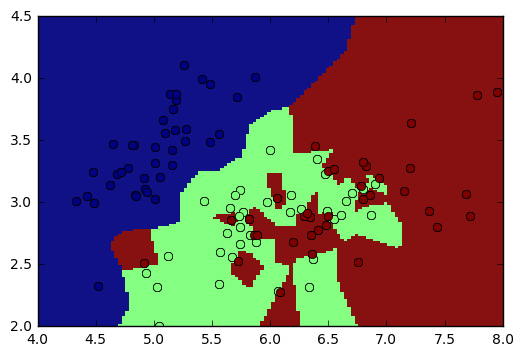

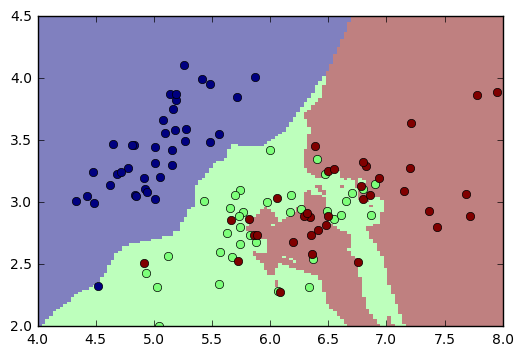

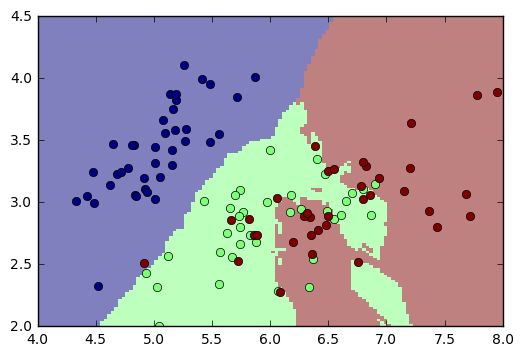

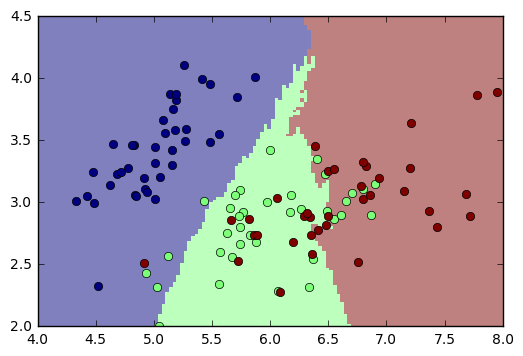

In [6]:
# Question 2
from __future__ import division
import mltools as ml
import numpy as np
np.random.seed(0) #With the seed reset, the same numbers will appear every time.
import matplotlib.pyplot as plt
iris = np.genfromtxt("data/iris.txt",delimiter=None)
Y = iris[:,-1]
X = iris[:,0:2]
(a)
X,Y = ml.shuffleData(X,Y);
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y, 0.75);

knn = ml.knn.knnClassify()
knn.train(Xtr, Ytr, 1)
YteHat = knn.predict(Xte) # get estimates of y for each data point in Xte
ml.plotClassify2D( knn, Xtr, Ytr )
plt.show()
knn.train(Xtr, Ytr, 5)
YteHat = knn.predict(Xte) # get estimates of y for each data point in Xte
ml.plotClassify2D( knn, Xtr, Ytr )
plt.show()
knn.train(Xtr, Ytr, 10)
YteHat = knn.predict(Xte) # get estimates of y for each data point in Xte
ml.plotClassify2D( knn, Xtr, Ytr )
plt.show()
knn.train(Xtr, Ytr, 50)
YteHat = knn.predict(Xte) # get estimates of y for each data point in Xte
ml.plotClassify2D( knn, Xtr, Ytr )
plt.show()

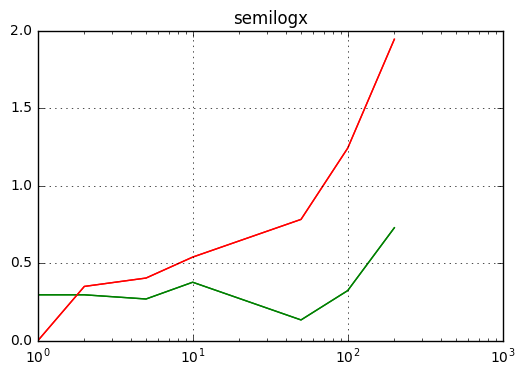

In [10]:
(b)
errTrain = [0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ]
errTest = [0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ]
K=[1,2,5,10,50,100,200];
for i,k in enumerate(K):
    learner = ml.knn.knnClassify()
    # TODO: complete code to predict results on training data
    learner.train(Xtr, Ytr, k)
    Ytrhat = learner.predict(Xtr)
    Ytr_diff = [m for m, n in zip(Ytrhat, Ytr) if m != n]
    # TODO: " " to count what fraction of predictions are wrong
    errTrain[i] = len(Ytr_diff)/ len(Yte)
    #TODO: repeat prediction / error evaluation for test data
    Ytehat = learner.predict(Xte)
    Yte_diff = [x for x, y in zip(Ytehat, Yte) if x != y]
    errTest[i] =  len(Yte_diff)/len(Yte) 
#print errTrain
#print errTest    
plt.semilogx(K,errTest,'g')
plt.semilogx(K,errTrain,'r')
plt.title('semilogx')
plt.grid(True)
plt.show()
#answer = 50//error is less there. well alance etween training and testing